In [17]:
from GateLibrary2 import pauli_gates
import GateLibrary2 as gl
import sympy as sp
import matplotlib.pyplot as plt
from sympy.physics.quantum import Dagger, TensorProduct
from sympy import Matrix, N
import numpy as np

In [18]:
a = 1
b = 0
c = 0
rho_t = (1/2)*(pauli_gates[0] + a*pauli_gates[1] + b*pauli_gates[2] + c*pauli_gates[3])
p_strength = [1/4,1/4,1/4,1/4]
q_strength = [1/4,1/4,1/4,1/4]

In [19]:
def Holevo_cap(rho_t,p_strength,q_strength):
    ket_plus = Matrix([[1/sp.sqrt(2)],[1/sp.sqrt(2)]])
    ket_minus = Matrix([[1/sp.sqrt(2)],[-1/sp.sqrt(2)]])

    output_state = Matrix([[0 for i in range(4)] for j in range(4)])
    for i in range(4):
        for j in range(4):
            commutator = pauli_gates[i]*pauli_gates[j]-pauli_gates[j]*pauli_gates[i]
            anticommutator = pauli_gates[i]*pauli_gates[j]+pauli_gates[j]*pauli_gates[i]
            if (commutator == Matrix([[0 for i in range(2)] for j in range(2)])):
                #Eksperimen gimana kalau kita pake \sqrt{p} dan \sqrt{q}
                output_state += (sp.sqrt(p_strength[i]**0.5))*(sp.sqrt(q_strength[j]**0.5))*TensorProduct(ket_plus*Dagger(ket_plus),anticommutator*rho_t*Dagger(anticommutator))
                #Eksperimen gimana kalau kita pake p^2 dan q^2
                #output_state += (p_strength[i]**2)*(q_strength[j]**2)*TensorProduct(ket_plus*Dagger(ket_plus),anticommutator*rho_t*Dagger(anticommutator))
                #Ini yang sesuai dengan Goswami
                #output_state += p_strength[i]*q_strength[j]*TensorProduct(ket_plus*Dagger(ket_plus),anticommutator*rho_t*Dagger(anticommutator))
            elif (anticommutator == Matrix([[0 for i in range(2)] for j in range(2)])):
                #Eksperimen gimana kalau kita pake \sqrt{p} dan \sqrt{q}
                output_state += (sp.sqrt(p_strength[i]))*(sp.sqrt(q_strength[j]**0.5))*TensorProduct(ket_plus*Dagger(ket_plus),anticommutator*rho_t*Dagger(anticommutator))
                #Eksperimen gimana kalau kita pake p^2 dan q^2
                #output_state += (p_strength[i]**2)*(q_strength[j]**2)*TensorProduct(ket_minus*Dagger(ket_minus),commutator*rho_t*Dagger(commutator))
                #Ini yang sesuai dengan Goswami
                #output_state += p_strength[i]*q_strength[j]*TensorProduct(ket_minus*Dagger(ket_minus),commutator*rho_t*Dagger(commutator))
            else:
                raise Exception('This is not supposed to happen')
    

    rho_c_tilde = Matrix([[output_state[0,0]+output_state[1,1],output_state[0,2]+output_state[1,3]],[output_state[2,0]+output_state[3,1],output_state[2,2]+output_state[3,3]]])

    #Cari eigen value dari output state dan \tilde{\rho}_c
    Eigen_value = output_state.eigenvals()
    EigValC = rho_c_tilde.eigenvals()

    keys = gl.get_keys(Eigen_value)
    keys_c = gl.get_keys(EigValC)

    H_output = gl.vonNeumann(keys)
    H_c = gl.vonNeumann(keys_c)

    Holevo_cap = 1 + H_c - H_output

    return Holevo_cap



In [20]:
N(Holevo_cap(rho_t,p_strength,q_strength))

-12.4602333401851 + 0.e-81*I

c:\Users\cahya\anaconda3\envs\SymbolicComputation\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


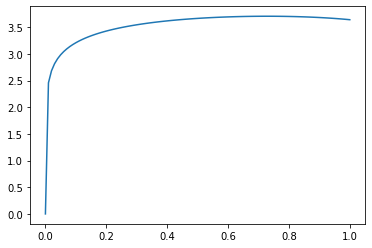

In [21]:
q_strength = np.arange(0.0,1.01,0.01)
Holevo_capacities = np.zeros(len(q_strength),dtype = complex)
rho_t

for i in range(len(q_strength)):
    q=q_strength[i]
    dep_q_strength = [1-(3*q/4),q/4,q/4,q/4]
    Holevo_capacities[i] = Holevo_cap(rho_t,dep_q_strength,dep_q_strength)

plt.plot(q_strength,np.log2(Holevo_capacities))


In [22]:
print(Holevo_capacities)

[  1.        -6.18824955e-032j  -5.49133934-5.81482495e-064j
  -6.41765378+1.05421979e-081j  -7.0340414 +0.00000000e+000j
  -7.50847284-4.16775343e-064j  -7.89885203+5.27109897e-082j
  -8.2327266 -1.83377325e-063j  -8.52557138+1.84659572e-127j
  -8.78702994+0.00000000e+000j  -9.02355758-3.46012613e-031j
  -9.23970835-1.38949703e-063j  -9.43882684-4.21719832e-063j
  -9.62344887+2.63554949e-082j  -9.79554736+0.00000000e+000j
  -9.95669048+0.00000000e+000j -10.10814728-3.42635412e-064j
 -10.25096067-9.90796170e-032j -10.38599908-6.13976900e-064j
 -10.51399407-2.52378321e-063j -10.63556815-2.46946795e-063j
 -10.75125581+0.00000000e+000j -10.86151963+1.84659572e-127j
 -10.96676282-2.01259642e-063j -11.06733911-1.77497805e-063j
 -11.16356062-9.25521672e-063j -11.25570419+0.00000000e+000j
 -11.34401656-6.51100456e-064j -11.42871858-2.51469055e-063j
 -11.51000875+5.27109897e-082j -11.58806607+0.00000000e+000j
 -11.66305256-1.80378330e-063j -11.73511523-1.84659572e-127j
 -11.80438795-3.09683714

In [23]:
log_Holevo = np.log2(Holevo_capacities)
log_Holevo

array([2.76235939e-63-8.92775694e-32j, 2.45715807e+00-4.53236014e+00j,
       2.68204596e+00+4.53236014e+00j, 2.81435383e+00+4.53236014e+00j,
       2.90851951e+00-4.53236014e+00j, 2.98164300e+00+4.53236014e+00j,
       3.04137032e+00-4.53236014e+00j, 3.09179653e+00+4.53236014e+00j,
       3.13537561e+00+4.53236014e+00j, 3.17369634e+00-4.53236014e+00j,
       3.20784731e+00-4.53236014e+00j, 3.23860756e+00-4.53236014e+00j,
       3.26655402e+00+4.53236014e+00j, 3.29212611e+00+4.53236014e+00j,
       3.31566628e+00+4.53236014e+00j, 3.33744669e+00-4.53236014e+00j,
       3.35768721e+00-4.53236014e+00j, 3.37656810e+00-4.53236014e+00j,
       3.39423892e+00-4.53236014e+00j, 3.41082520e+00-4.53236014e+00j,
       3.42643328e+00+4.53236014e+00j, 3.44115406e+00+4.53236014e+00j,
       3.45506583e+00-4.53236014e+00j, 3.46823650e+00-4.53236014e+00j,
       3.48072534e+00-4.53236014e+00j, 3.49258441e+00+4.53236014e+00j,
       3.50385964e+00-4.53236014e+00j, 3.51459175e+00-4.53236014e+00j,
      

c:\Users\cahya\anaconda3\envs\SymbolicComputation\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


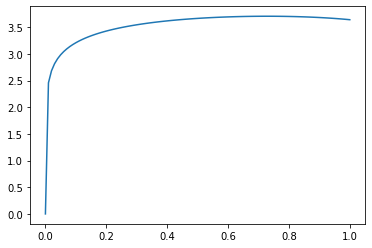

In [24]:
plt.plot(q_strength,log_Holevo)